# Proyek Predictive Analytics: Orange Quality Data
- **Nama:** Rachmat Risky Saputra
- **Email:** rachmatrisky5@gmail.com
- **ID Dicoding:** rahmtris

## Deskripsi Proyek

### Latar Belakang Proyek Prediksi Kualitas Buah Anggur dengan Menggunakan Machine Learning

Proyek ini bertujuan untuk membangun model machine learning yang mampu memprediksi kualitas buah anggur dengan lebih akurat dan efisien. Saat ini, proses penilaian kualitas anggur masih dilakukan secara manual, yang membutuhkan banyak waktu, tenaga serta memiliki risiko kesalahan yang tinggi, contohnya jika buah anggur yang harus dinilai sangat banyak dan orang yang bertugas hanya sedikit, tentu dengan seiring berjalannya waktu, penilai-penilai ini akan kelelahan yang bisa mengurangi fokus mereka dalam menilai kualitas buah anggur. Kondisi ini dapat menyebabkan kerugian bagi petani, serta menghasilkan produk yang tidak memenuhi ekspetasi konsumen. Dengan adanya model prediksi kualitas buah anggur, harapannya masalah ini dapat diatasi melalui solusi yang lebih akurat dan efisien.

## Import library yang Diperlukan

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Understanding

Data Understanding adalah tahap awal dalam proses analisis data yang bertujuan untuk memahami isi, struktur, dan karakteristik data yang tersedia. Pada tahap ini, dilakukan beberapa aktivitas utama seperti:
- Mengevaluasi kualitas data, termasuk mengidentifikasi data yang hilang, tidak konsisten, atau outlier.
- Memahami makna dari setiap fitur (kolom) dalam dataset.
- Menganalisis distribusi data untuk menemukan pola, tren, dan anomali.
- Menilai keterkaitan antar fitur yang dapat mempengaruhi performa yang dihasilkan oleh model.

### Data Loading

Data Loading adalah tahapan untuk memuat dataset yang akan digunakan ke dalam notebook.

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahmtris","key":"f6538cf938386853fedfe90579af99c4"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mrmars1010/grape-quality

Dataset URL: https://www.kaggle.com/datasets/mrmars1010/grape-quality
License(s): apache-2.0


In [5]:
zip_ref = zipfile.ZipFile("/content/grape-quality.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [6]:
grapes_df = pd.read_csv("GRAPE_QUALITY.csv")
grapes_df

sample_id             variety          region  quality_score  \
0            1            Riesling  Barossa Valley           2.11   
1            2          Pinot Noir    Loire Valley           2.83   
2            3     Sauvignon Blanc     Napa Valley           3.52   
3            4            Riesling     Napa Valley           2.28   
4            5              Merlot     Napa Valley           2.90   
..         ...                 ...             ...            ...   
995        996     Sauvignon Blanc     Napa Valley           3.14   
996        997  Cabernet Sauvignon          Sonoma           2.65   
997        998          Pinot Noir     Napa Valley           2.11   
998        999           Zinfandel    Loire Valley           2.28   
999       1000              Merlot     Napa Valley           1.96   

    quality_category  sugar_content_brix  acidity_ph  cluster_weight_g  \
0             Medium               13.70        3.17            251.81   
1               High               20.84        3.15            289.00   
2            Premium               27.46        4.07            125.14   
3             Medium               24.64        3.15            237.46   
4               High               26.13        3.18            221.52   
..               ...                 ...         ...               ...   
995             High               23.14        4.01            182.63   
996             High               29.13        3.02            150.32   
997           Medium               11.38        3.23            168.37   
998           Medium               11.14        3.21            208.98   
999           Medium               15.64        4.02             98.41   

     berry_size_mm harvest_date  sun_exposure_hours  soil_moisture_percent  \
0            18.58   2023-09-04                 8.4                   55.9   
1            22.08   2023-09-16                 8.8                   36.9   
2            21.40   2023-08-25                11.1                   64.9   
3            12.31   2023-09-13                 8.0                   54.5   
4            12.24   2023-08-11                11.2                   36.3   
..             ...          ...                 ...                    ...   
995          23.46   2023-09-09                10.1                   53.2   
996          11.79   2023-08-19                 9.0                   56.7   
997          14.92   2023-08-28                10.6                   66.5   
998          22.24   2023-08-24                 8.9                   43.8   
999          18.96   2023-08-29                 6.9                   54.9   

     rainfall_mm  
0          223.3  
1          312.1  
2          698.7  
3          660.1  
4          410.4  
..           ...  
995        363.9  
996        325.7  
997        473.2  
998        745.1  
999        262.7  

[1000 rows x 13 columns]

Output kode di atas memberikan informasi sebagai berikut:
- ada 1.000 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 13 kolom yaitu: sample_id, variety, region, quality_score, quality_category, sugar_content_brix, acidity_ph, cluster_weight_g, berry_size_mm, harvest_date, sun_exposure_hours, soil_moisture_percent, rainfall_mm

## Exploratory Data Analysis (EDA)

### Exploratory Data Analysis - Deskripsi Variabel

Berdasarkan informasi dari kaggle, variabel-variabel pada dataset Grape Quality adalah sebagai berikut:
- sample_id: Nomor unik untuk setiap sampel anggur. Seperti nomor identitas untuk membedakan satu sampel dengan lainnya.
- variety: Jenis atau varietas anggur (contoh: Carbenet Sauvignon, Merlot, dll).
- region: Wilayah atau daerah tempat anggur ditanam. Setiap daerah punya iklim berbeda yang mempengaruhi kualitas anggur.
- quality_score: Skor angka yang menunjukkan sebebarapa bagus kualitas anggur (semakin tinggi, semakin bagus).
- quality_category: Kategori dari skor kualitas, dikelompokkan menjadi "Low", "Medium", "High", dan "Premium". Ini memudahkan untuk studi kasus klasifikasi.
- sugar_content_brix: Tingkat rasa manis anggur, diukur dalam satuan Brix (°Bx). Semakin tinggi Brix, semakin manis anggurnya.  
- acidity_ph: Tingkat keasaman anggur. pH < 7 berarti asam. semakin rendah pH, semakin asam rasa anggurnya.
- cluster_weight_g: Berat satu tandan (sekumpulan) buah anggur, dalam satuan gram.
- harvest_date: Tanggal kapan anggur dipanen. Waktu panen bisa mempengaruhi rasa manis, asam, dan kualitas keseluruhan.
- sun_exposure_hours: Total jumlah jam anggur terkena sinar matahari. Sinar matahari membantu anggur matang dengan baik.
- soil_moisture_percent: Persentase kadar air dalam tempat anggur tumbuh. Ini mempengaruhi pertumbuhan dan rasa buah.
- rainfall_mm: Jumlah curah hujan (dalam milimeter) yang diterima kebun anggur selama masa tumbuh.

In [7]:
grapes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              1000 non-null   int64  
 1   variety                1000 non-null   object 
 2   region                 1000 non-null   object 
 3   quality_score          1000 non-null   float64
 4   quality_category       1000 non-null   object 
 5   sugar_content_brix     1000 non-null   float64
 6   acidity_ph             1000 non-null   float64
 7   cluster_weight_g       1000 non-null   float64
 8   berry_size_mm          1000 non-null   float64
 9   harvest_date           1000 non-null   object 
 10  sun_exposure_hours     1000 non-null   float64
 11  soil_moisture_percent  1000 non-null   float64
 12  rainfall_mm            1000 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB


Dari output terlihat bahwa:
- Terdapat 4 kolom dengan tipe object, yaitu: variety, region, quality_category dan harvest_date. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 8 kolom numerik dengan tipe data float64 yaitu: quality_score, sugar_content_brix, acidity_ph, cluster_weight_g, berry_size_mm, sun_exposure_hours, soil_moisture_percent, rainfall_mm.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: sample_id.

In [8]:
grapes_df.describe()

sample_id  quality_score  sugar_content_brix   acidity_ph  \
count  1000.000000     1000.00000         1000.000000  1000.000000   
mean    500.500000        2.49436           20.140150     3.503410   
std     288.819436        0.52896            5.843944     0.406907   
min       1.000000        1.10000           10.060000     2.800000   
25%     250.750000        2.10000           14.817500     3.167500   
50%     500.500000        2.50000           20.375000     3.500000   
75%     750.250000        2.87000           25.212500     3.860000   
max    1000.000000        3.97000           29.990000     4.200000   

       cluster_weight_g  berry_size_mm  sun_exposure_hours  \
count       1000.000000    1000.000000         1000.000000   
mean         197.112470      17.411620            8.992600   
std           85.946831       4.302279            1.736462   
min           50.200000      10.000000            6.000000   
25%          122.572500      13.677500            7.500000   
50%          195.285000      17.415000            8.900000   
75%          271.265000      21.097500           10.400000   
max          349.870000      24.970000           12.000000   

       soil_moisture_percent  rainfall_mm  
count            1000.000000   1000.00000  
mean               49.731900    489.42300  
std                11.591189    170.95025  
min                30.100000    200.10000  
25%                39.600000    341.60000  
50%                49.400000    490.40000  
75%                60.300000    628.65000  
max                70.000000    799.30000

Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum

In [9]:
grapes_df.shape

(1000, 13)

### Explatory Data Analysis - Menangani Missing Value, Duplicated Value dan Outliers

In [10]:
grapes_df.isnull().sum()

sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64

Dari output di atas, terlihat bahwa tidak ada missing values pada dataset.

In [11]:
grapes_df.duplicated().sum()

np.int64(0)

Dari output di atas, terlihat bahwa tidak ada data duplikat pada dataset.

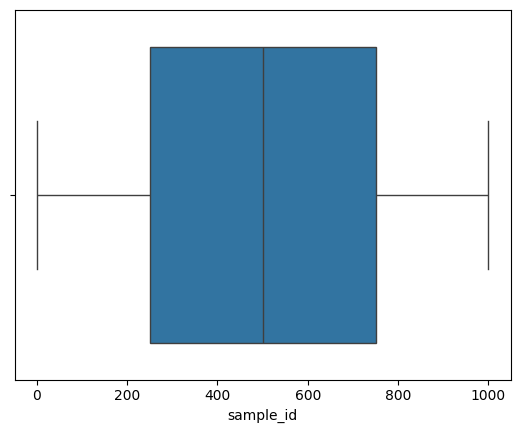

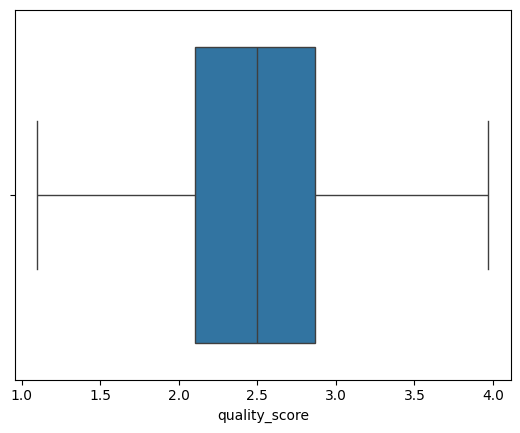

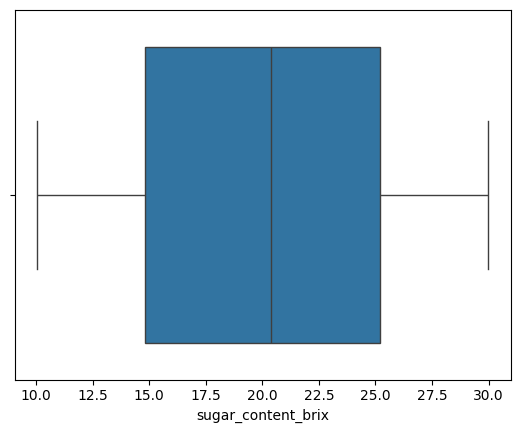

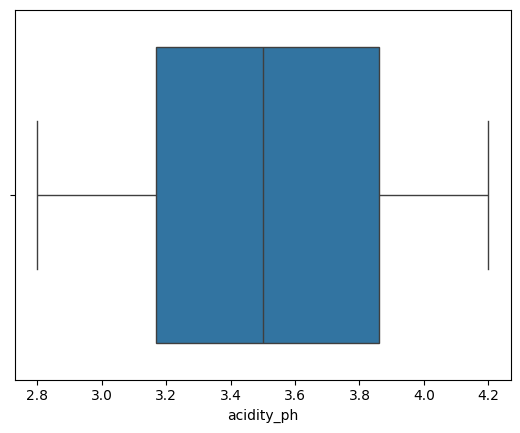

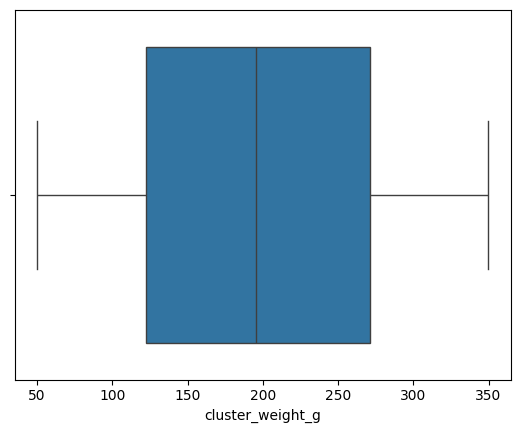

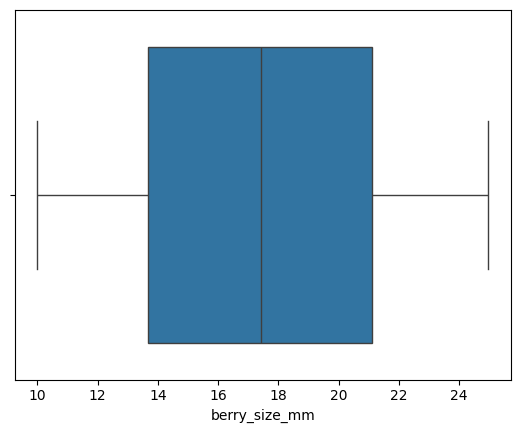

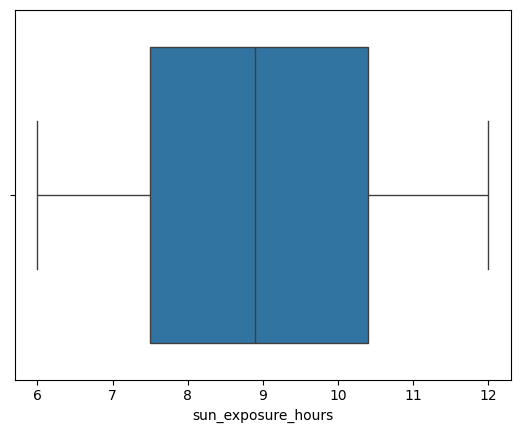

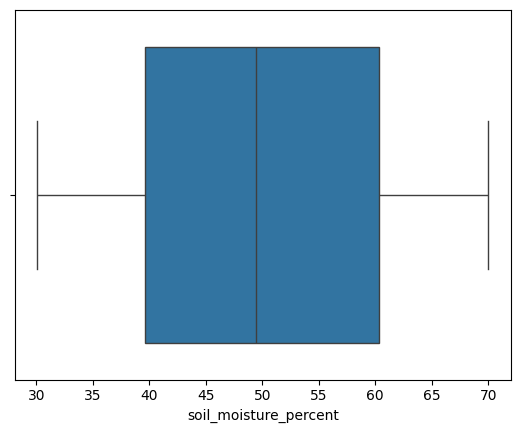

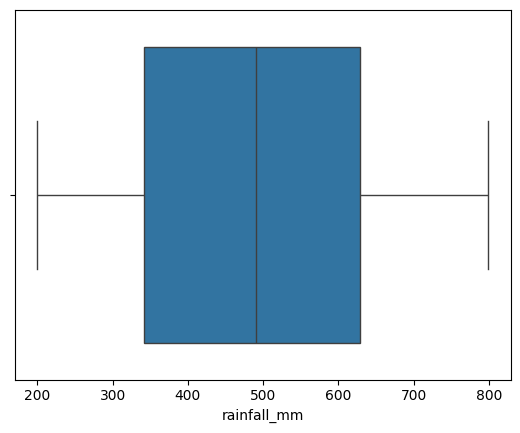

In [12]:
outliers = grapes_df.select_dtypes(exclude=["object"])
for column in outliers:
  plt.figure()
  sns.boxplot(data=outliers, x=column)

Berdasarkan output di atas, bisa diketahui bahwa tidak ada outliers dalam dataset ini, jadi kita tidak perlu melakukan penanganan outliers.

### Exploratory Data Analysis - Univariate Analysis

In [13]:
numerical_features = ["quality_score", "sugar_content_brix", "acidity_ph", "cluster_weight_g", "berry_size_mm", "sun_exposure_hours", "soil_moisture_percent", "rainfall_mm"]
categorical_features = ["variety", "region", "harvest_date", "quality_category"]

#### Fitur Kategori

                    Jumlah sampel  persentase
variety                                      
Pinot Noir                    146        14.6
Zinfandel                     134        13.4
Cabernet Sauvignon            133        13.3
Sauvignon Blanc               125        12.5
Riesling                      119        11.9
Chardonnay                    117        11.7
Merlot                        113        11.3
Syrah                         113        11.3


<Axes: title={'center': 'variety'}, xlabel='variety'>

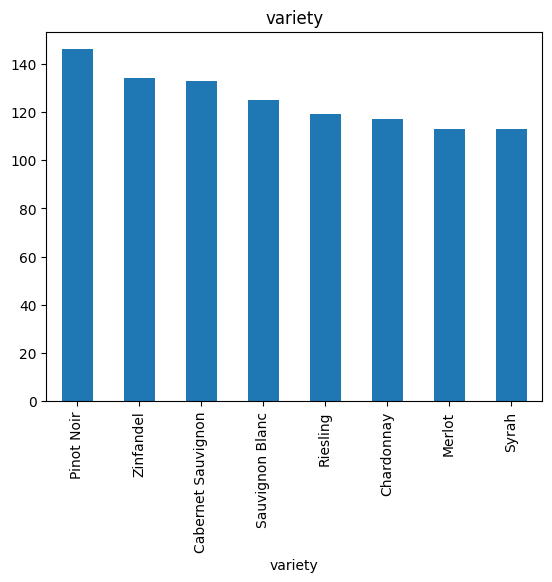

In [14]:
feature = categorical_features[0]
count = grapes_df[feature].value_counts()
percentage = 100 * grapes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({"Jumlah sampel": count, "persentase": percentage.round(1)})
print(df)
count.plot(kind="bar", title=feature)

                Jumlah sampel  persentase
region                                   
Napa Valley               137        13.7
Barossa Valley            136        13.6
Bordeaux                  133        13.3
Mendoza                   130        13.0
Sonoma                    127        12.7
Loire Valley              126        12.6
Rioja                     107        10.7
Tuscany                   104        10.4


<Axes: title={'center': 'region'}, xlabel='region'>

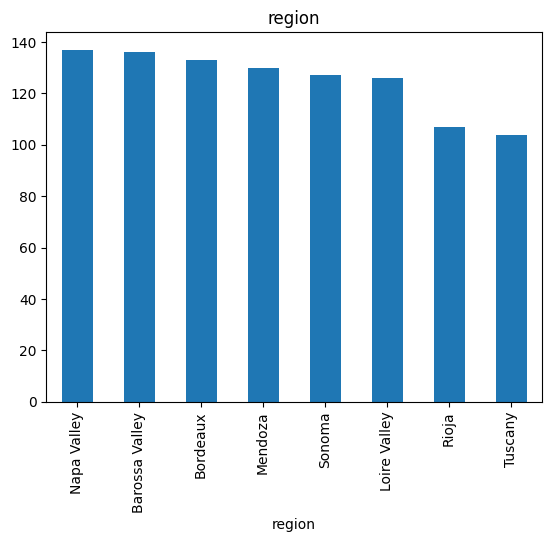

In [15]:
feature = categorical_features[1]
count = grapes_df[feature].value_counts()
percentage = 100 * grapes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({"Jumlah sampel": count, "persentase": percentage.round(1)})
print(df)
count.plot(kind="bar", title=feature)

              Jumlah sampel  persentase
harvest_date                           
2023-08-20               29         2.9
2023-09-04               28         2.8
2023-09-11               25         2.5
2023-09-03               24         2.4
2023-08-16               23         2.3
...                     ...         ...
2023-08-12               11         1.1
2023-09-06               11         1.1
2023-09-08               11         1.1
2023-08-31                8         0.8
2023-09-12                6         0.6

[61 rows x 2 columns]


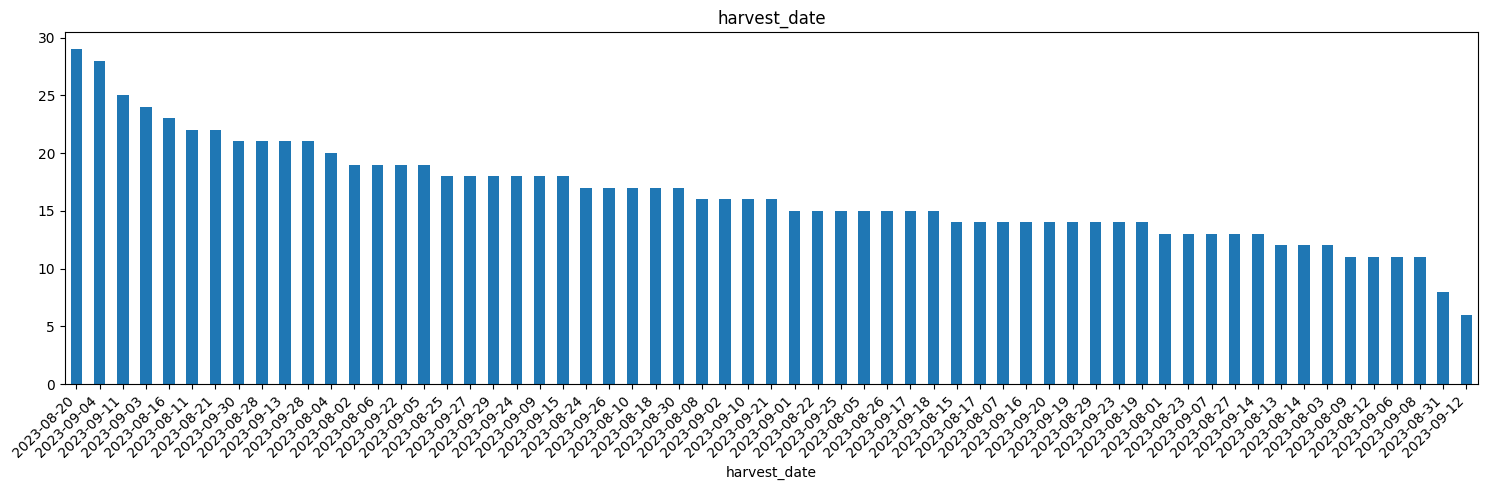

In [16]:
feature = categorical_features[2]
count = grapes_df[feature].value_counts()
percentage = 100 * grapes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({"Jumlah sampel": count, "persentase": percentage.round(1)})
print(df)

plt.figure(figsize=(15, 5))
count.plot(kind="bar", title=feature)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

                  Jumlah sampel  persentase
quality_category                           
Medium                      477        47.7
High                        468        46.8
Premium                      29         2.9
Low                          26         2.6


<Axes: title={'center': 'quality_category'}, xlabel='quality_category'>

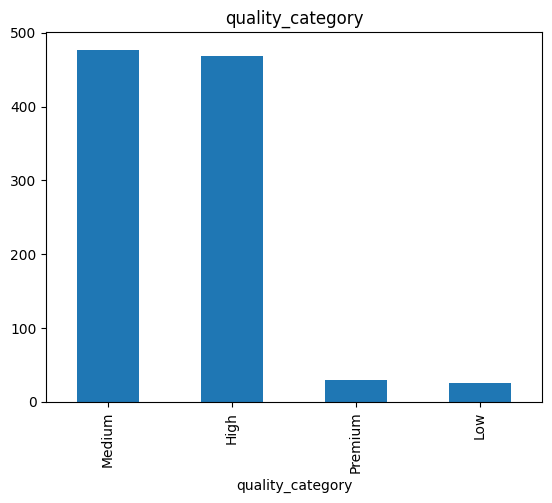

In [17]:
feature = categorical_features[3]
count = grapes_df[feature].value_counts()
percentage = 100 * grapes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({"Jumlah sampel": count, "persentase": percentage.round(1)})
print(df)
count.plot(kind="bar", title=feature)

#### Fitur Numerik

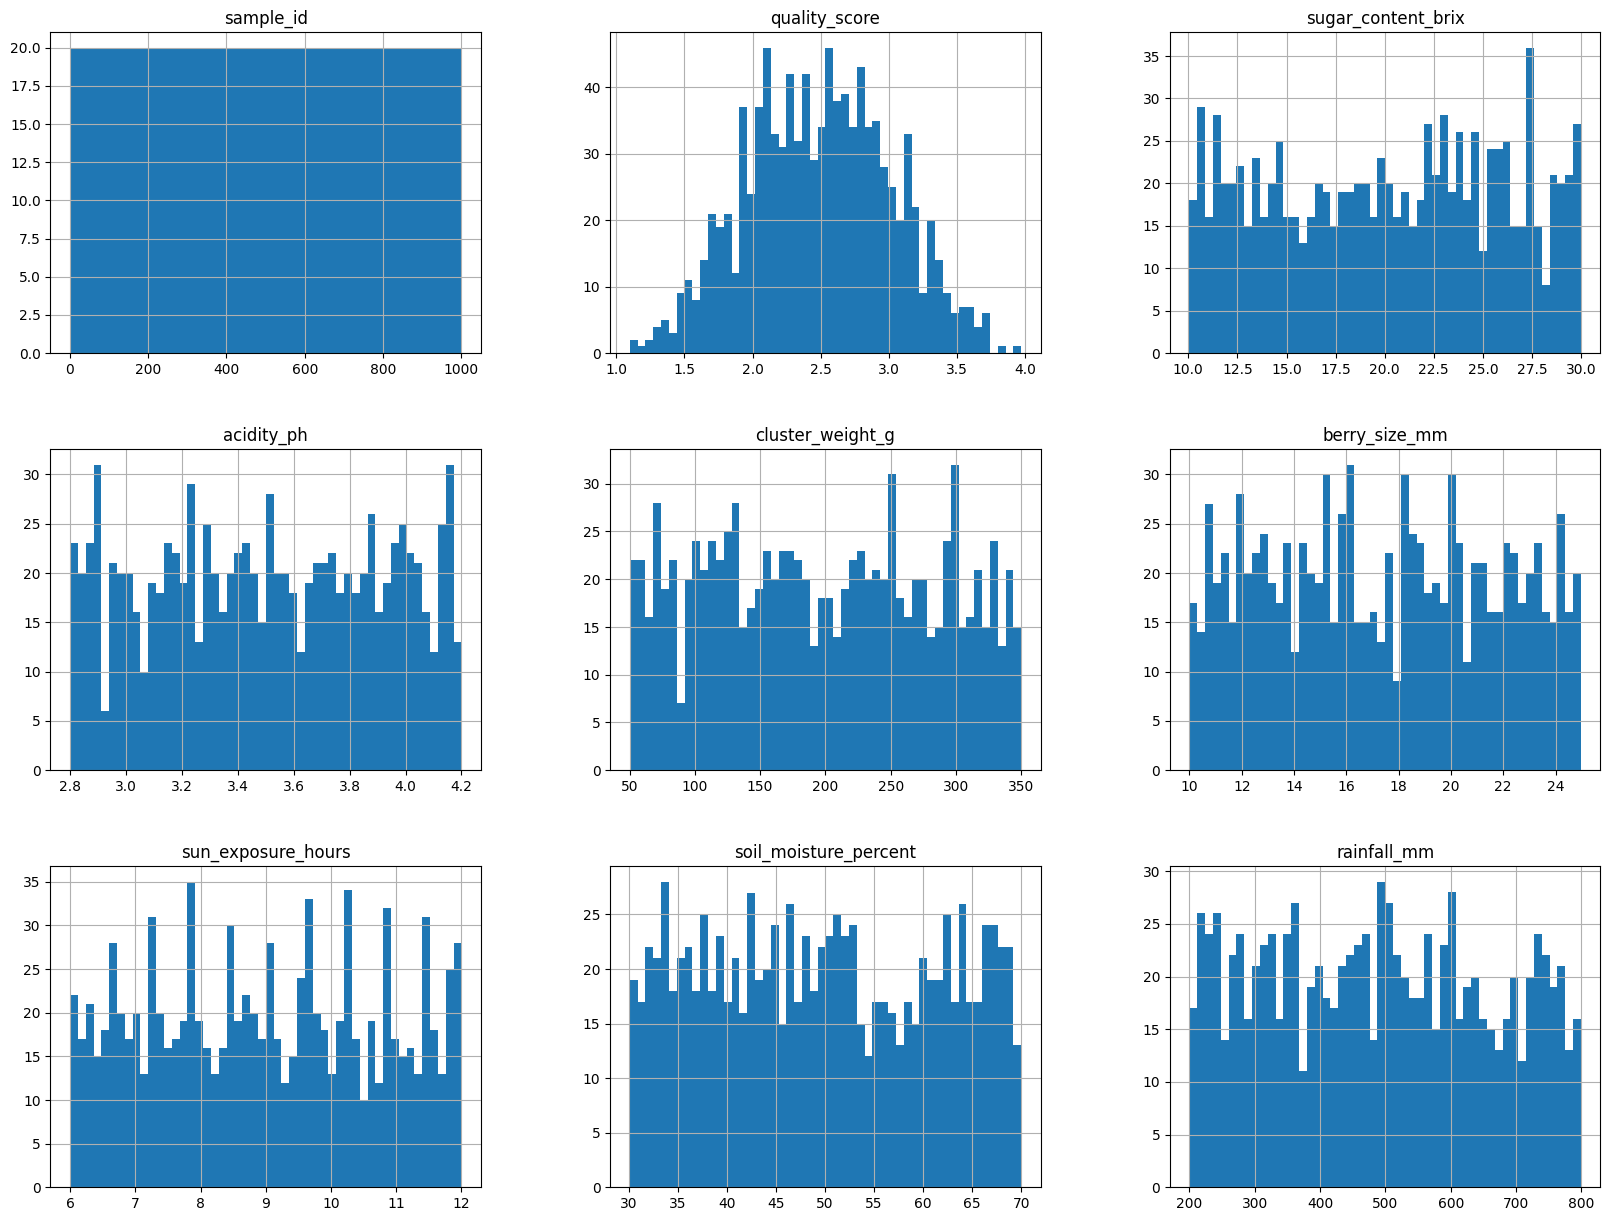

In [18]:
grapes_df.hist(bins=50, figsize=(20, 15))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis

#### Fitur Numerik

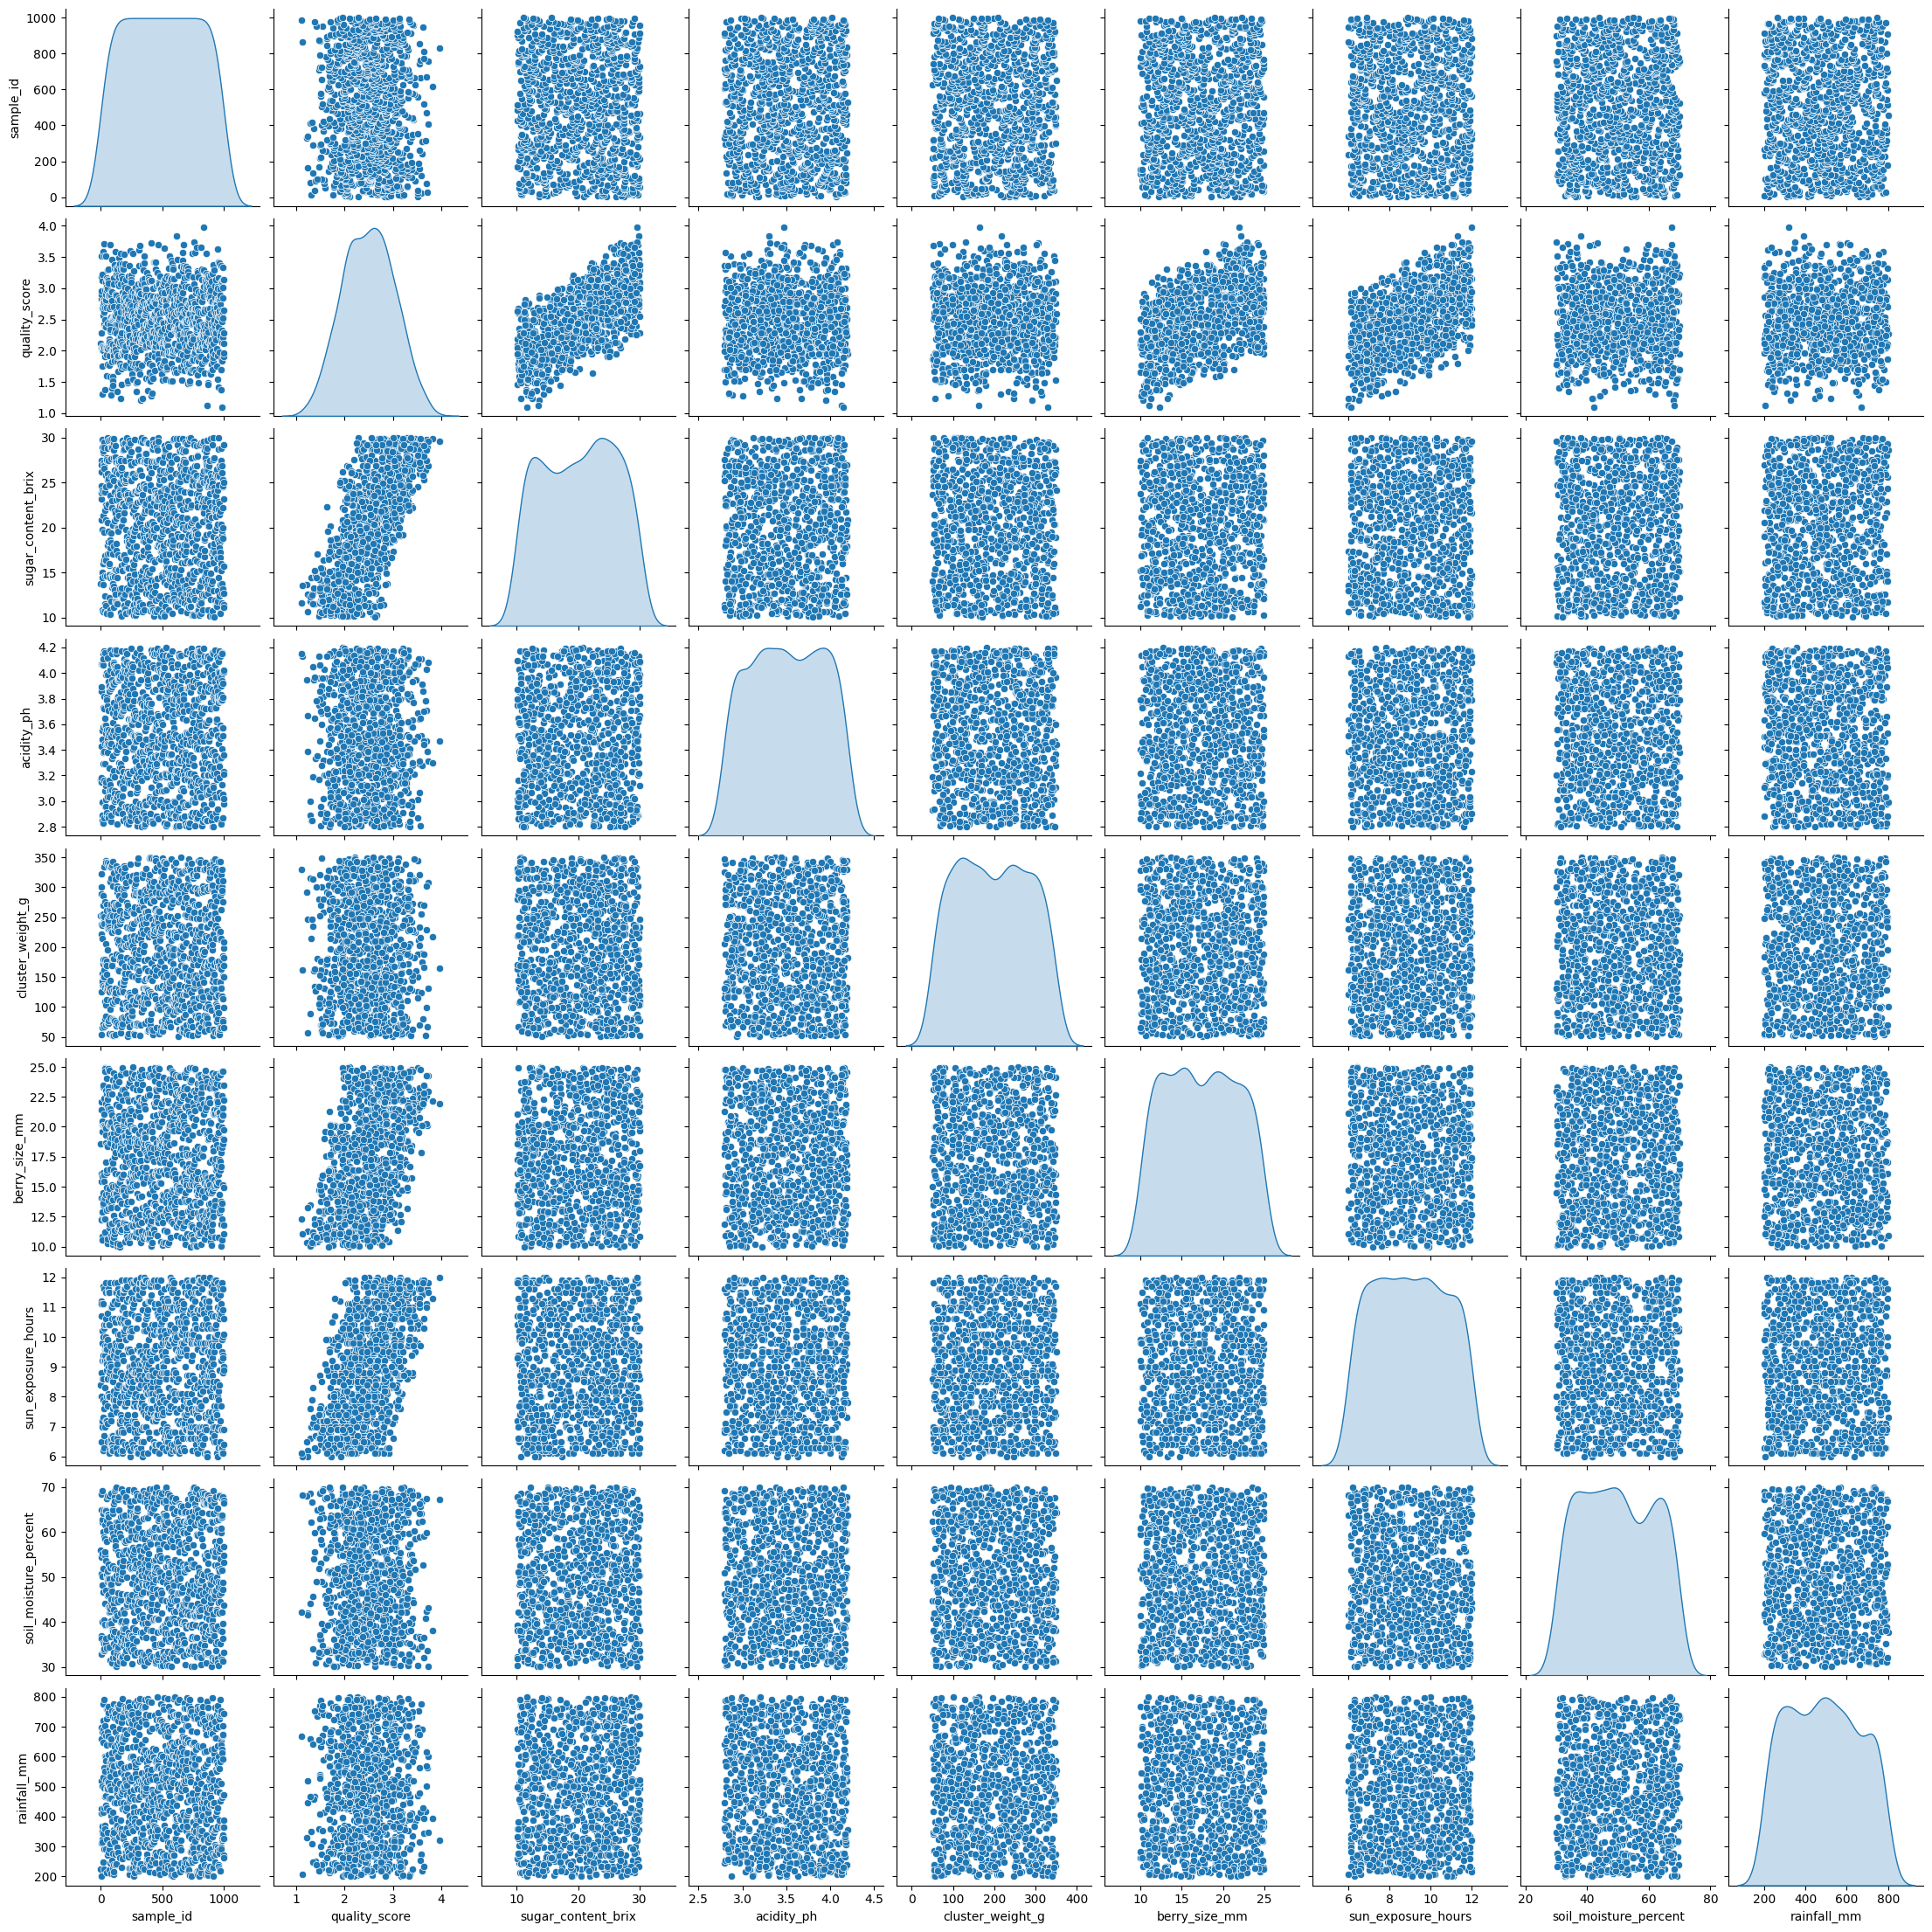

In [19]:
sns.pairplot(grapes_df, diag_kind="kde")

Text(0.5, 1.0, 'Matriks korelasi untuk fitur numerik')

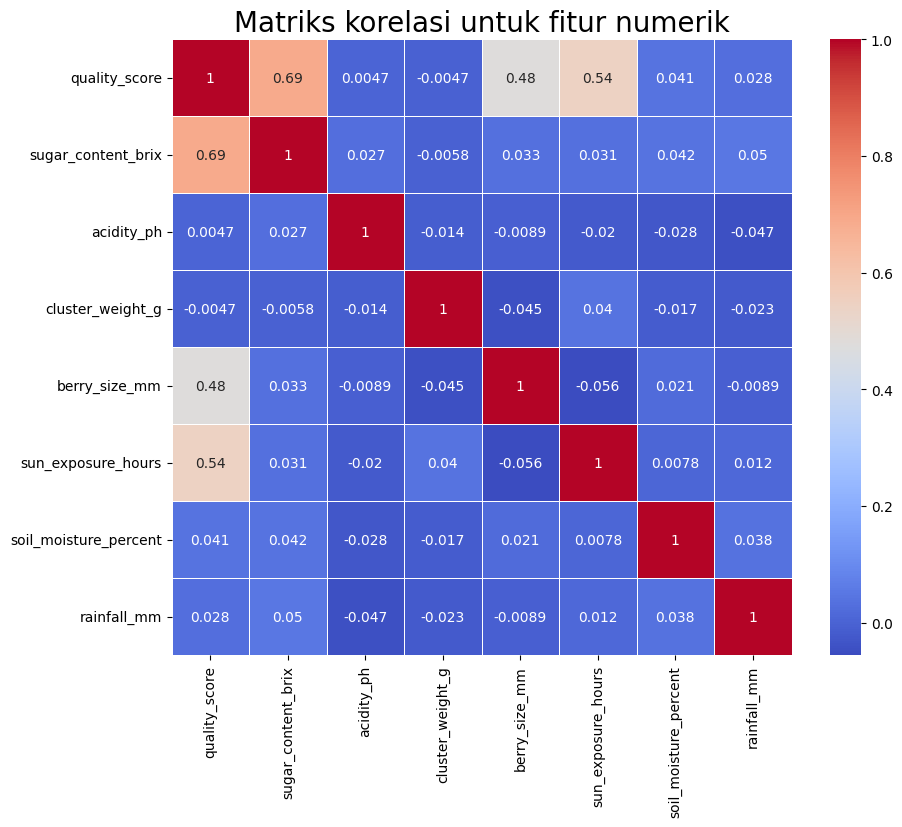

In [20]:
plt.figure(figsize=(10, 8))
corr_matrix = grapes_df[numerical_features].corr()

sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(f"Matriks korelasi untuk fitur numerik", size=20)

## Data Preparation

Data Preparation adalah adalah tahapan untuk mempersiapkan dataset melalui proses seperti data cleaning, data structuring, data transformation dll. Agar dataset siap digunakan untuk pelatihan model machine learning.

### Data Cleaning

### Encoding Fitur Kategori

In [21]:
categorical_features

['variety', 'region', 'harvest_date', 'quality_category']

In [22]:
grapes_df = pd.concat([grapes_df, pd.get_dummies(grapes_df["variety"], prefix="variety")], axis=1)
grapes_df = pd.concat([grapes_df, pd.get_dummies(grapes_df["region"], prefix="region")], axis=1)
grapes_df.drop(["variety", "region"], axis=1, inplace=True)
grapes_df.head()

sample_id  quality_score quality_category  sugar_content_brix  acidity_ph  \
0          1           2.11           Medium               13.70        3.17   
1          2           2.83             High               20.84        3.15   
2          3           3.52          Premium               27.46        4.07   
3          4           2.28           Medium               24.64        3.15   
4          5           2.90             High               26.13        3.18   

   cluster_weight_g  berry_size_mm harvest_date  sun_exposure_hours  \
0            251.81          18.58   2023-09-04                 8.4   
1            289.00          22.08   2023-09-16                 8.8   
2            125.14          21.40   2023-08-25                11.1   
3            237.46          12.31   2023-09-13                 8.0   
4            221.52          12.24   2023-08-11                11.2   

   soil_moisture_percent  ...  variety_Syrah  variety_Zinfandel  \
0                   55.9  ...          False              False   
1                   36.9  ...          False              False   
2                   64.9  ...          False              False   
3                   54.5  ...          False              False   
4                   36.3  ...          False              False   

   region_Barossa Valley  region_Bordeaux  region_Loire Valley  \
0                   True            False                False   
1                  False            False                 True   
2                  False            False                False   
3                  False            False                False   
4                  False            False                False   

   region_Mendoza  region_Napa Valley  region_Rioja  region_Sonoma  \
0           False               False         False          False   
1           False               False         False          False   
2           False                True         False          False   
3           False                True         False          False   
4           False                True         False          False   

   region_Tuscany  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 27 columns]

In [23]:
custom_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2,
    "Premium": 3,
}

grapes_df["quality_category_encoded"] = grapes_df["quality_category"].map(custom_mapping)
print(grapes_df[["quality_category", "quality_category_encoded"]].head())

  quality_category  quality_category_encoded
0           Medium                         1
1             High                         2
2          Premium                         3
3           Medium                         1
4             High                         2


In [24]:
grapes_df.drop(["quality_category"], axis=1, inplace=True)

In [25]:
grapes_df.drop(["sample_id"], axis=1, inplace=True)

In [26]:
grapes_df.drop(["harvest_date"], axis=1, inplace=True)

### Train-Test-Split

In [27]:
X = grapes_df.drop(["quality_category_encoded"], axis=1)
y = grapes_df[["quality_category_encoded"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standarisasi data training

In [28]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

quality_score  sugar_content_brix  acidity_ph  cluster_weight_g  \
29       -0.148709            1.078123    0.517569          0.508390   
535      -1.485210           -1.344890    1.134750         -1.243383   
695      -0.587845           -1.529957    0.048510         -1.590415   
557       0.653191           -0.354436   -0.716795          0.004979   
836      -0.492381           -1.324327    1.677870          1.555062   

     berry_size_mm  sun_exposure_hours  soil_moisture_percent  rainfall_mm  
29       -0.444585           -1.305720              -1.357338    -1.165443  
535       0.350008           -1.362657              -0.841035     0.793114  
695       1.370629           -0.622469               0.845553     0.710492  
557       0.669244            0.800968              -1.520834     0.103012  
836      -0.386330            1.313406              -0.436598     0.451927

## Model Development

In [29]:
models = pd.DataFrame(index=["accuracy_score"],
                      columns=["Naive Bayes", "SVM", "KNN", "Random Forest",])

### Pelatihan model Naive Bayes

In [30]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

### Pelatihan model SVC

In [31]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Pelatihan model KNN

In [32]:
KNN_model = KNeighborsClassifier(n_neighbors=5, weights="distance")
KNN_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(weights='distance')

### Pelatihan Model Random Forest

In [33]:
rf_model = RandomForestClassifier(max_depth=20)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20)

## Evaluasi Model

### Standarisasi data testing

In [34]:
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

quality_score  sugar_content_brix  acidity_ph  cluster_weight_g  \
521       1.245069            1.439690   -1.284602         -0.060315   
737      -1.275188           -1.096420    0.122572          0.922807   
740       2.008783            1.072982   -0.494609          1.456774   
660      -0.167802            0.295013   -0.124300          0.081774   
411      -2.325295           -1.379162   -1.259915         -1.241989   

     berry_size_mm  sun_exposure_hours  soil_moisture_percent  rainfall_mm  
521       0.312725            0.288531              -0.970111     0.095879  
737      -0.486528           -0.793282              -1.684329    -0.963941  
740       0.806725            1.313406              -1.116397     0.445388  
660       0.082037           -1.077969               0.269015    -1.571421  
411      -1.691234           -0.793282              -0.488229    -0.115134

### Melakukan testing model dengan data tes

In [35]:
nb_prediction = nb_model.predict(X_test)
models.loc["accuracy_score", "Naive Bayes"] = accuracy_score(y_test, nb_prediction)

svc_prediction = svc_model.predict(X_test)
models.loc["accuracy_score", "SVM"] = accuracy_score(y_test, svc_prediction)

KNN_prediction = KNN_model.predict(X_test)
models.loc["accuracy_score", "KNN"] = accuracy_score(y_test, KNN_prediction)

rf_prediction = rf_model.predict(X_test)
models.loc["accuracy_score", "Random Forest"] = accuracy_score(y_test, rf_prediction)

### Hasil akurasi model dalam dataframe

In [36]:
models

Naive Bayes   SVM    KNN Random Forest
accuracy_score        0.93  0.93  0.885         0.955

### Plot Visualisasi Akurasi Model

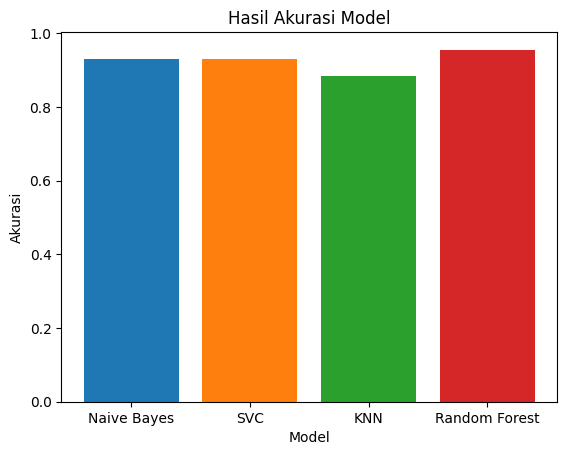

In [37]:
plt.bar('Naive Bayes', models['Naive Bayes'])
plt.bar('SVC', models['SVM'])
plt.bar('KNN', models['KNN'])
plt.bar('Random Forest', models['Random Forest'])
plt.title("Hasil Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()